# Notes on Sklearn.linear_model

In [52]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
!ls data

2008_all_states.csv           boston.csv
2008_swing_states.csv         michelson_speed_of_light.csv
belmont.csv                   sheffield_weather_station.csv


In [3]:
!head data/boston.csv

CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
0.032369999999999996,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.9,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.43,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.6,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.9,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


In [4]:
df = pd.read_csv('data/boston.csv')

In [5]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
rooms = df['RM']
print(rooms.head())

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
Name: RM, dtype: float64


In [8]:
type(rooms.values)

numpy.ndarray

In [9]:
rooms.values.shape

(506,)

In [10]:
# extract the values since sklearn operates with numpy arrays
X = rooms.values
y = df['MEDV'].values

In [11]:
print("before reshape")
print ("X:", X.shape)
print ("y: ", y.shape)

# change the shape of X, y to be able to use sklearn classes
print("after reshape")
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)
print ("X:", X.shape)
print ("y: ", y.shape)

before reshape
X: (506,)
y:  (506,)
after reshape
X: (506, 1)
y:  (506, 1)


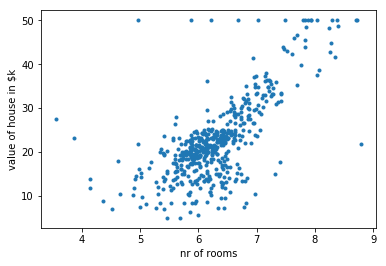

In [12]:
plt.plot(X, y, marker='.', linestyle='none')
plt.xlabel('nr of rooms')
plt.ylabel('value of house in $k')
plt.show()

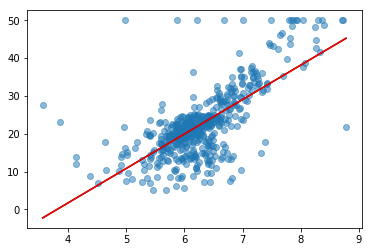

In [13]:
# fit a regression model
lr = LinearRegression()
lr.fit(X, y)
prediction_space = np.linspace( min(X), max(X) ).reshape(-1,1)
plt.scatter(X, y, alpha=0.5)

# using sklearn
plt.plot(prediction_space, lr.predict(prediction_space), color='black')

# using np.polyfitf
X1 = X.reshape(-1,)
y1 = y.reshape(-1,)
a,b = np.polyfit(X1, y1, 1)
plt.plot( [min(X1), max(X1)], a * np.array([min(X1), max(X1)]) + b, color='red' )
plt.show()

# both models look to give the same intercept and slope

In [14]:
# Metrics to evaluate linear regression models
y_pred = lr.predict(X)
mse = mean_squared_error (y, y_pred)
print ("R^2 score: ", lr.score(X,y))
print ("RMSE -  Root mean square error", np.sqrt(mse) )

R^2 score:  0.483525455991
RMSE -  Root mean square error 6.60307138922


In [15]:
# do the model fit using train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

score = reg.score(X_test, y_test)
rmse = np.sqrt( mean_squared_error(y_test, y_pred) )

print ("R^2 score: ", score)
print ("RMSE: ", rmse )

R^2 score:  0.45846499343
RMSE:  6.35227909477


In [16]:
# calculate the cross validation score since previous R^2 is dependent on how the data is smapled
# this rmethod applies a fold when sampling
cvs = cross_val_score(reg, X, y, cv=5)
print ("cvs:", cvs)
print ("mean(cvs):", np.mean(cvs))

cvs: [ 0.70708692  0.63476138  0.50385441 -0.21594318 -1.77736913]
mean(cvs): -0.0295219199578


In [42]:
# define X as all the vars from the data frame
X = df.drop('MEDV', axis=1).values
factors =  df.drop('MEDV', axis=1).columns
print (X.shape)

(506, 13)


In [47]:
# use a Lasso class to fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso =  Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

score  = lasso.score(X_test, y_test)
rmse = np.sqrt( mean_squared_error(y_test, y_pred) )
print ("R^2 score: ", score)
print ("RMSE: ", rmse )

cvs = cross_val_score(lasso, X_test, y_test, cv=5)
print ("cvs:", cvs)
print ("mean(cvs):", np.mean(cvs))

R^2 score:  0.595022953533
RMSE:  5.49327710626
cvs: [ 0.76554328  0.7035749   0.72878529 -0.0099459   0.59838894]
mean(cvs): 0.557269301703


In [48]:
# use Laso to select important features
lasso =  Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

In [49]:
lasso_coef

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

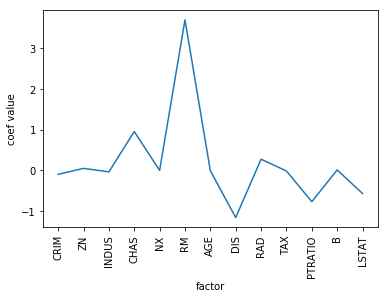

In [50]:
plt.plot(range(len(lasso_coef)), lasso_coef)
plt.xticks(range(len(lasso_coef)), factors, rotation=90)
plt.xlabel('factor')
plt.ylabel('coef value')
plt.show()

# RM stands out

In [56]:
# using ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, y_train)

score  = ridge.score(X_test, y_test)
rmse = np.sqrt( mean_squared_error(y_test, y_pred) )
print ("R^2 score: ", score)
print ("RMSE: ", rmse )

cvs = cross_val_score(ridge, X_test, y_test, cv=5)
print ("cvs:", cvs)
print ("mean(cvs):", np.mean(cvs))

R^2 score:  0.699693827513
RMSE:  5.49327710626
cvs: [ 0.81816581  0.77899219  0.82576728  0.04041273  0.68409716]
mean(cvs): 0.629487034291


In [80]:
rmse_all = {}
for alpha in np.linspace(0.01, 1, 100):
    ridge = Ridge(alpha=0.1, normalize=True)
    ridge.fit(X_train, y_train)

    rmse = np.sqrt( mean_squared_error(y_test, y_pred) )
    rmse_all[alpha] = rmse

print ("Min rmse ", min(rmse_all, key=rmse_all.get), ": ", rmse_all[ min(rmse_all, key=rmse_all.get)])

Min rmse  0.01 :  5.49327710626


In [ ]:
5.4932771062635188